In [1]:
import pandas as pd
flt = pd.read_csv("E:\DATA scientist\R\Flight\Flight1987 csv.csv")
flt.shape

(1048575, 13)

In [2]:
flt1 = pd.read_csv("E:\DATA scientist\R\Flight\Flight1987 csv.csv")

In [3]:
flt.head(2)

,w,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,ArrDelay,Distance,DepDelay
0,10.0,14.0,3.0,741.0,730.0,912.0,849.0,1451.0,91.0,79.0,23.0,447.0,11.0
1,10.0,15.0,4.0,729.0,730.0,903.0,849.0,1451.0,94.0,79.0,14.0,447.0,-1.0


In [4]:
flt.isnull().sum()

w                      674
DayofMonth             674
DayOfWeek              674
DepTime              15179
CRSDepTime             674
ArrTime              17959
CRSArrTime             674
FlightNum              674
ActualElapsedTime    17959
CRSElapsedTime         674
ArrDelay             17959
Distance               674
DepDelay             15179
dtype: int64

In [5]:
flt = flt.drop(["FlightNum"],axis = 1)

In [6]:
flt = flt.dropna(subset = ["w","DayofMonth","DayOfWeek","DepTime","ArrTime","ActualElapsedTime","ArrDelay","DepDelay"])

In [7]:
flt.isnull().sum()

w                    0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
ActualElapsedTime    0
CRSElapsedTime       0
ArrDelay             0
Distance             0
DepDelay             0
dtype: int64

In [8]:
import numpy as np

In [9]:
flt["Flight_Delayed"] = np.where(flt["DepDelay"] > 20,1,0)

In [73]:
flt.head()

,w,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,ArrDelay,Distance,Flight_Delayed
0,10.0,14.0,3.0,741.0,730.0,912.0,849.0,91.0,79.0,23.0,447.0,0
1,10.0,15.0,4.0,729.0,730.0,903.0,849.0,94.0,79.0,14.0,447.0,0
2,10.0,17.0,6.0,741.0,730.0,918.0,849.0,97.0,79.0,29.0,447.0,0
3,10.0,18.0,7.0,729.0,730.0,847.0,849.0,78.0,79.0,-2.0,447.0,0
4,10.0,19.0,1.0,749.0,730.0,922.0,849.0,93.0,79.0,33.0,447.0,0


In [11]:
flt = flt.drop(["DepDelay"],axis = 1)

In [15]:
import seaborn as sns

In [12]:
from sklearn.model_selection import train_test_split

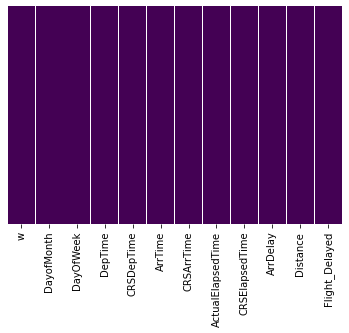

In [22]:
sns.heatmap(flt.isnull(),yticklabels = False, cbar = False,cmap = 'viridis')

In [27]:
X = flt[["w","DayofMonth","DayOfWeek","DepTime","CRSDepTime","ArrTime","CRSArrTime","ActualElapsedTime","CRSElapsedTime","ArrDelay","Distance"]]
y = flt[["Flight_Delayed"]]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [54]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [55]:
rf.fit(X_train,y_train)

<ipython-input-55-d6d9475b85dc>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


RandomForestClassifier()

In [58]:
rf.score(X_test,y_test)

0.9851206070132542

In [59]:
y_pred = rf.predict(X_test)

In [67]:
from sklearn.metrics import confusion_matrix
tab = confusion_matrix(y_pred,y_test)

In [68]:
tab

array([[185220,   2506],
       [   561,  17837]], dtype=int64)